**Logistic regression and Keras for classification**

https://aigeekprogrammer.com/binary-classification-using-logistic-regression-and-keras/

In [1]:
import numpy as np
from tensorflow import keras
print (keras.__version__)

2.5.0


In [26]:
from keras.datasets import mnist

#We import data into variables and check their shape.

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [27]:
y_train.shape

(60000,)

In [28]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
#we create new variables that contain only zeros and ones.

#x_train_new, y_train_new = x_train[(y_train==0) | (y_train==1)], y_train[(y_train==0) | (y_train==1)]

#Let’s check the shape of the new variables.

#x_train_new.shape

(12665, 28, 28)

In [18]:
#np.unique(y_train_new)

array([0, 1], dtype=uint8)

In [29]:
#we need to flatten data into two dimensions only: index and flattened image data (28 * 28 = 784).

x_train_final = x_train.reshape((-1, 784))
x_train_final.shape

(60000, 784)

In [8]:
#A similar sequence of operations we perform for the test set.

#x_test_new, y_test_new = x_test[(y_test==0) | (y_test==1)], y_test[(y_test==0) | (y_test==1)]
#x_test_new.shape

(2115, 28, 28)

In [30]:
x_test_final = x_test.reshape((-1, 784))

In [31]:
#The last element of data preprocessing is their normalization.

x_train_final = x_train_final / 255
x_test_final = x_test_final / 255

Model:   polynomial value: x1 * w1 + x2 * w2 + … + x784 * w784

In [39]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), activation='softmax'))

In [36]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(
  x=x_train_final,
  y=y_train,
  shuffle=True,
  epochs=10,
  batch_size=32
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7739 - accuracy: 0.8162
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4561 - accuracy: 0.8804
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4032 - accuracy: 0.8913
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3766 - accuracy: 0.8971
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3599 - accuracy: 0.9016
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3479 - accuracy: 0.9037
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3390 - accuracy: 0.9062
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3319 - accuracy: 0.9082
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3261 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.321

In [38]:
eval = model.evaluate(x=x_test_final, y=y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3063 - accuracy: 0.9157


In [41]:
x_test_final.shape

(10000, 784)

In [55]:
model.predict(x_test_final)

array([[0.13025473, 0.16443047, 0.08220303, ..., 0.09397627, 0.0720684 ,
        0.06835999],
       [0.14101511, 0.13935721, 0.03401191, ..., 0.06262361, 0.05474415,
        0.06202348],
       [0.1271706 , 0.08549672, 0.08558014, ..., 0.07586759, 0.10916813,
        0.10432363],
       ...,
       [0.21700272, 0.10909065, 0.04916679, ..., 0.07188012, 0.05122512,
        0.10929968],
       [0.16989538, 0.08120854, 0.10522784, ..., 0.04490495, 0.05665889,
        0.10756479],
       [0.1891115 , 0.20412207, 0.03154029, ..., 0.13582376, 0.0224752 ,
        0.06501102]], dtype=float32)

[[0.13025473 0.16443048 0.08220303 0.13093054 0.08129378 0.08990427
  0.08657842 0.09397629 0.0720684  0.06835999]]


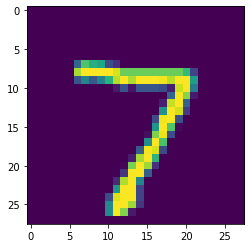

In [60]:
import matplotlib.pyplot as plt

idx =0
print(model.predict(x_test_final[idx,:].reshape(1, -1)))
plt.imshow(x_test_final[idx,:].reshape(28, 28))